In [1]:
pip install wordfreq

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pytrends

In [5]:
import re
import pandas as pd
import numpy as np
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from wordfreq import word_frequency
import csv

In [2]:
#regex, find out the tags
file = open("Ad Settings.html", "r")
ad=file.read()
regex='<div class="c7O9k">((\w| |-|:)+)'
a=re.findall(regex,ad)

In [56]:
#clean tags and turn them to list
lst=[]
num=0
for ele in a:
    lst.append([ele[0]][0].strip())
for num in range(len(lst)):
    lst[num]=lst[num].replace(' ','_')
string=''
for ele in lst:
    string=string+' '+ele
string=string.replace('-','_')
string=string.replace('18-34_years_old','')
string=string.replace('Language:_English_and_2_more','English')
string=string.replace('Parental_Status:_Not_A_Parent','')
string=string.replace('Homeownership_Status:_Homeowners','')
string=string.replace('Household_Income:_Upper_Middle','')
string=string.replace( 'Marital_Status:_Single','')
lst=string.split()
lst

['18_34_years_old',
 'Male',
 'English',
 'Action',
 'Adventure_Games',
 'Apparel',
 'Autos',
 'Beauty',
 'Books',
 'Burgers',
 'Business_News',
 'Business_Services',
 'Camera',
 'Career_Resources',
 'Celebrities',
 'Classical_Music',
 'Coffee',
 'Combat_Sports',
 'Comics',
 'Computer',
 'Computer_Components',
 'Computer_Peripherals',
 'Computers',
 'Construction',
 'Consumer_Electronics',
 'Cooking',
 'Dance',
 'DJ_Resources',
 'Dogs',
 'Fashion',
 'Fast_Food',
 'Flowers',
 'Food',
 'Gourmet',
 'Greeting_Cards',
 'Home_Improvement',
 'Horror_Films',
 'Hospitality_Industry',
 'Inheritance',
 'Job_Listings',
 'Living_Room_Furniture',
 'Local_News',
 'Mass_Merchants',
 'Mobile_Phones',
 'Movies',
 'Moving',
 'Music',
 'News',
 'Pet_Food',
 'Pets',
 'Politics',
 'Pop_Music',
 'Printers',
 'Product_Reviews',
 'Restaurants',
 'Roleplaying_Games',
 'Sedans',
 'Shopping',
 'Snack_Foods',
 'Social_Networks',
 'Sofas',
 'Sports',
 'Strategy_Games',
 'Swimwear',
 'Travel',
 'TV_Dramas',
 'TV_Net

In [59]:
#measure occurance
dic={}
num=0
for word in lst:
    if word not in dic:
        dic[word]=1
    else:
        dic[word]+=1
dic

{'18_34_years_old': 1,
 'Male': 1,
 'English': 1,
 'Action': 1,
 'Adventure_Games': 1,
 'Apparel': 1,
 'Autos': 1,
 'Beauty': 1,
 'Books': 1,
 'Burgers': 1,
 'Business_News': 1,
 'Business_Services': 1,
 'Camera': 1,
 'Career_Resources': 1,
 'Celebrities': 1,
 'Classical_Music': 1,
 'Coffee': 1,
 'Combat_Sports': 1,
 'Comics': 1,
 'Computer': 1,
 'Computer_Components': 1,
 'Computer_Peripherals': 1,
 'Computers': 1,
 'Construction': 1,
 'Consumer_Electronics': 1,
 'Cooking': 1,
 'Dance': 1,
 'DJ_Resources': 1,
 'Dogs': 1,
 'Fashion': 1,
 'Fast_Food': 1,
 'Flowers': 1,
 'Food': 1,
 'Gourmet': 1,
 'Greeting_Cards': 1,
 'Home_Improvement': 1,
 'Horror_Films': 1,
 'Hospitality_Industry': 1,
 'Inheritance': 1,
 'Job_Listings': 1,
 'Living_Room_Furniture': 1,
 'Local_News': 1,
 'Mass_Merchants': 1,
 'Mobile_Phones': 1,
 'Movies': 1,
 'Moving': 1,
 'Music': 1,
 'News': 1,
 'Pet_Food': 1,
 'Pets': 1,
 'Politics': 1,
 'Pop_Music': 1,
 'Printers': 1,
 'Product_Reviews': 1,
 'Restaurants': 1,
 'R

In [60]:
#turn into dataframe
df2=pd.DataFrame.from_dict(dic,orient='index',columns=['occurance'])
df2['word']=df2.index
df2

,occurance,word
18_34_years_old,1,18_34_years_old
Male,1,Male
English,1,English
Action,1,Action
Adventure_Games,1,Adventure_Games
...,...,...
Visual_Art,1,Visual_Art
World_Music,1,World_Music
Yoga,1,Yoga
Photographic,1,Photographic


In [61]:
df2.to_csv('frequency.csv')

In [6]:
#use mannually collected google data to measure frequency
file=pd.read_csv('word_frequency.csv')
file.index=file.word
file['final']=file['occurance']/file['Google_Trend _Frequency']
file['final']=round(file['final']/file['final'].min())
file

,Unnamed: 0,occurance,word,Comparing_round,Value,Base_Word,Base_Value,Unnamed: 7,Google_Trend _Frequency,final
word,,,,,,,,,,
Male,Male,1,Male,2,54.0000,travel,85.0,NaN,3618.000000,9.0
English,English,1,English,2,86.0000,travel,35.0,NaN,13993.428570,2.0
Action,Action,1,Action,2,37.0000,travel,85.0,NaN,2479.000000,13.0
Adventure_Games,Adventure_Games,1,Adventure_Games,2,52.0000,Used_Vehicles,75.0,NaN,46.453333,678.0
Apparel,Apparel,1,Apparel,2,10.0000,travel,85.0,NaN,670.000000,47.0
...,...,...,...,...,...,...,...,...,...,...
Visual_Art,Visual_Art,1,Visual_Art,1,23.0000,NaN,NaN,NaN,23.000000,1370.0
World_Music,World_Music,1,World_Music,1,85.3125,NaN,NaN,NaN,85.312500,369.0
Yoga,Yoga,1,Yoga,2,90.0000,TV_Drama,1.0,NaN,3150.000000,10.0


In [7]:
#def word_freq_cal(word):
 #   return float(word_frequency(word, 'en'))
#df2.reset_index()
#df2['word_fre']=df2['word'].apply(word_freq_cal)
#df2['final']=df2['occurance']/df2['word_fre']
#df2['final']=round(df2['final']/df2['final'].min())

In [8]:
#create final word list
final_word_str=''
dict_final=file['final'].to_dict()
dict_final
for word in dict_final:   
    print(word)
    for num in range(int(dict_final[word])):
        final_word_str+=word
        final_word_str+=' '
final_word_str

Male
English
Action
Adventure_Games
Apparel
Autos
Beauty
Books
Burgers
Business_News
Business_Services
Camera
Career_Resources
Celebrities
Classical_Music
Coffee
Combat_Sports
Comics
Computer_Components
Computer_Peripherals
Computers
Construction
Consumer_Electronics
Cooking
Dance
DJ_Resources
Dogs
Fashion
Fast_Food
Flowers
Food
Gourmet
Greeting_Cards
Home_Improvement
Horror_Films
Hospitality_Industry
Inheritance
Job_Listings
Living_Room_Furniture
Local_News
Mass_Merchants
Mobile_Phones
Movies
Moving
Music
News
Pet_Food
Pets
Politics
Pop_Music
Printers
Product_Reviews
Restaurants
Sedans
Shopping
Snack_Foods
Social_Networks
Sofas
Sports
Strategy_Games
Swimwear
Travel
TV_Dramas
TV_Networks
TV_Sci_Fi
Urban_Transit
Used_Vehicles
Visual_Art
World_Music
Yoga
Photographic
Performing_Arts


'Male Male Male Male Male Male Male Male Male English English Action Action Action Action Action Action Action Action Action Action Action Action Action Adventure_Games Adventure_Games Adventure_Games Adventure_Games Adventure_Games Adventure_Games Adventure_Games Adventure_Games Adventure_Games Adventure_Games Adventure_Games Adventure_Games Adventure_Games Adventure_Games Adventure_Games Adventure_Games Adventure_Games Adventure_Games Adventure_Games Adventure_Games Adventure_Games Adventure_Games Adventure_Games Adventure_Games Adventure_Games Adventure_Games Adventure_Games Adventure_Games Adventure_Games Adventure_Games Adventure_Games Adventure_Games Adventure_Games Adventure_Games Adventure_Games Adventure_Games Adventure_Games Adventure_Games Adventure_Games Adventure_Games Adventure_Games Adventure_Games Adventure_Games Adventure_Games Adventure_Games Adventure_Games Adventure_Games Adventure_Games Adventure_Games Adventure_Games Adventure_Games Adventure_Games Adventure_Games

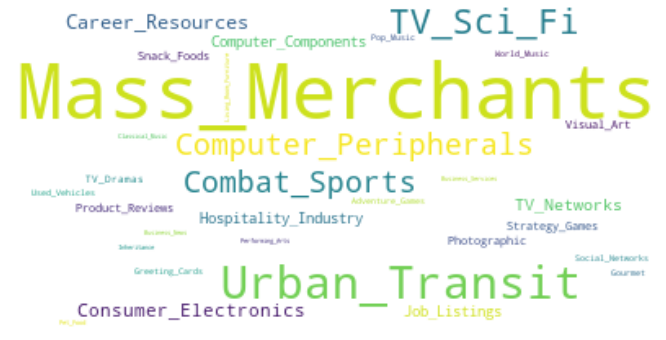

In [64]:
#create word cloud
wordcloud = WordCloud(max_font_size=1000, max_words=100, collocations=False,background_color="white",stopwords=['Status','years','old','and','more','Roleplaying']).generate(final_word_str)
plt.figure(figsize=(20,6))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()